# EDA FARS (Fatality Analysis Reporting System)

### What is this Dataset about?

<p>Data is for automobiles where the right passenger seat was occupied, with one observation for each such passenger. Observations for vehicles where the most harmful event was a fire or explosion or immersion or gas inhalation, or where someone fell or jumped from the vehicle, are omitted. Data is limited to vehicle body types 1 to 19,48,49,61, or 62. This excludes large trucks, pickup trucks, vans and buses. The 2009 and 2010 data does not include information on whether airbags were installed.
</p>

In [126]:
from __future__ import division
#import required modules
import pandas as pd 
from IPython.display import display
import numpy as np
#matplotlib for additional coustomization
from matplotlib import pyplot as plt
%matplotlib inline

#seaborn for plotting and styling
import seaborn as sns
# to supress printing of exponential notation in pandas
pd.options.display.float_format = '{:20,.2f}'.format

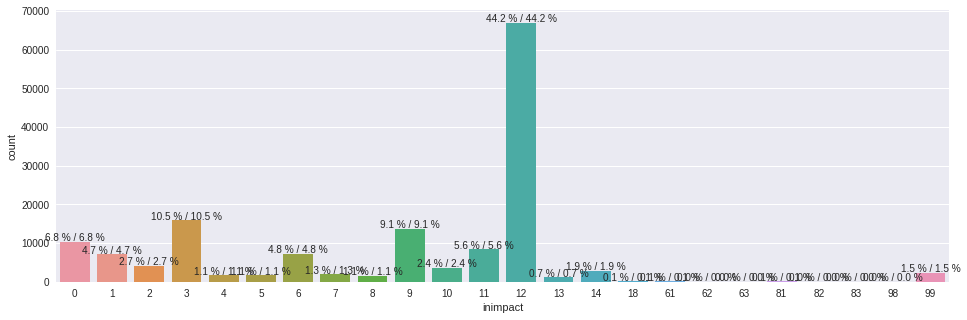

In [127]:
#helper functions
def bold(text_to_bold):
    """
    Bolds given string.
    args:todo
    returns:todo
    """
    bold = "\033[1m"
    reset = "\033[0;0m"
    return bold + text_to_bold + reset

def count_plot(column, axis, df, percent):
    total_rows = df.shape[0]
    plt.figure(figsize=(16,5))
    if axis == 'x':
        ax = sns.countplot(x=column, data=df)
    elif axis == 'y':
        ax = sns.countplot(y=column, data=df)
    
    if percent == 'show' and axis != 'y':
        for p in ax.patches:
            height=p.get_height()
            percent = (height*100)/total_rows
            total_percent = (height*100)/totalrows
            ax.text((p.get_x() + p.get_width()/2), p.get_height()+250, '{:1.1f} %'.format(percent) + ' / ' + '{:1.1f} %'.format(total_percent), ha='center')
        
count_plot('inimpact', 'x', data, 'show')

## File Structure

In [128]:
data = pd.read_csv('data/FARS.csv')
data = data.drop(labels=['Unnamed: 0'], axis=1)
print "Data shape:"
print "{} Rows x {} Columns".format(str(data.shape[0]), str(data.shape[1]))
data.head(10)

Data shape:
151158 Rows x 17 Columns


,caseid,state,age,airbag,injury,restraint,sex,inimpact,modelyr,airbagAvail,airbagDeploy,Restraint,D_injury,D_airbagAvail,D_airbagDeploy,D_Restraint,year
0,1:1:2,1,20,30,3,1,2,12,1991,no,no,yes,3,no,no,yes,1998
1,1:2:1,1,41,30,2,0,1,2,1987,no,no,no,2,no,no,no,1998
2,1:3:1,1,26,30,3,0,1,4,1983,no,no,no,4,no,no,no,1998
3,1:8:1,1,17,1,4,0,1,11,1997,yes,yes,no,4,yes,yes,no,1998
4,1:10:1,1,19,30,3,0,1,12,1998,no,no,no,4,yes,yes,no,1998
5,1:13:1,1,1,30,4,4,1,3,1991,no,no,yes,3,no,no,yes,1998
6,1:15:1,1,24,1,3,0,1,2,1995,yes,yes,no,3,yes,yes,yes,1998
7,1:19:2,1,50,30,4,3,2,3,1984,no,no,yes,3,no,no,yes,1998
8,1:21:1,1,16,30,4,3,2,12,1991,no,no,yes,3,yes,yes,yes,1998
9,1:23:1,1,53,30,4,0,1,3,1988,no,no,no,4,no,no,no,1998


## Let's see how impact position effects the death

### inimpact: location code of initial impact


total impact points:  24


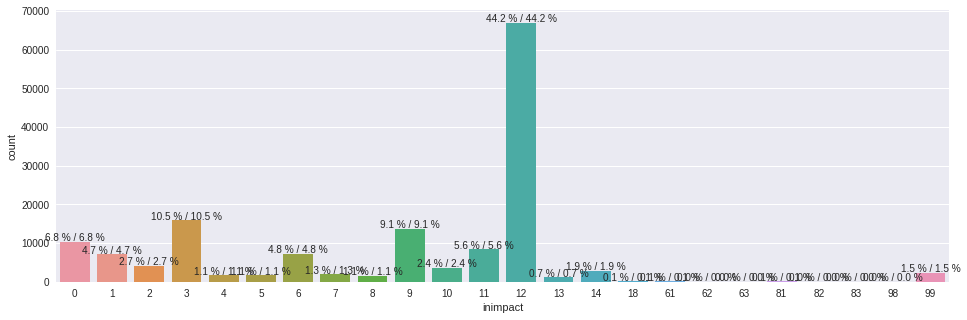

In [129]:
print 'total impact points: ', len(data.inimpact.value_counts().keys())
count_plot('inimpact', 'x', data, 'show')

<img src="img/inimpact.png" />

So 44% of the deaths are caused by the inimpact 12 (front)

20% by 3 and 9

### Lets dig down more to see why 44% o deaths were casued by inimpact 12

In [130]:
filter_ = (data.inimpact == 12)
data_sepecific_inimpact = data[filter_]

#### Lets see if airbag were deployed in this inimpact or not

(66878, 17)


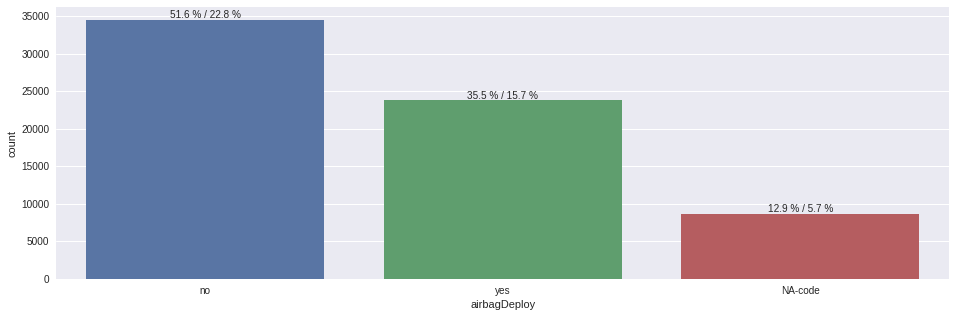

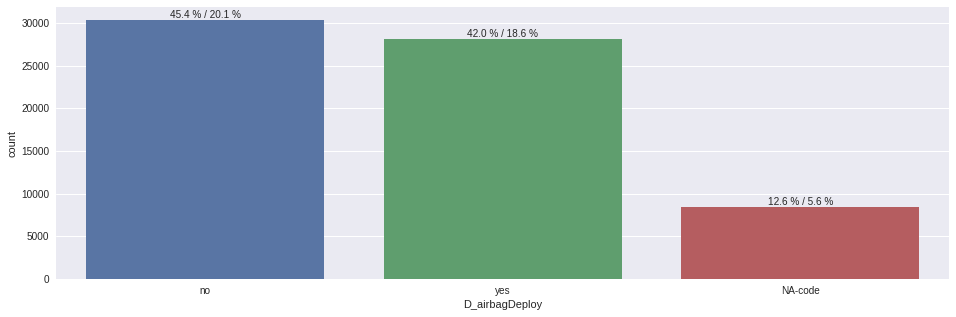

In [133]:
filter_ = data_sepecific_inimpact.ari
count_plot('airbagDeploy', 'x', data_sepecific_inimpact, 'show') # passenger's injury 
count_plot('D_airbagDeploy', 'x', data_sepecific_inimpact, 'show') # driver's injury

So in most of the cases, airbag weren't deployed. Mostly the passenger's one was

#### What about injuries?